# Analiza podatkov

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [5]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,3,4,3,2,3,0,0,0,21,27,26,25,21,23
1,2,1,1,2,2,1,2,0,21,29,28,26,24,25
2,3,5,3,3,3,2,1,0,35,9,23,27,23,20


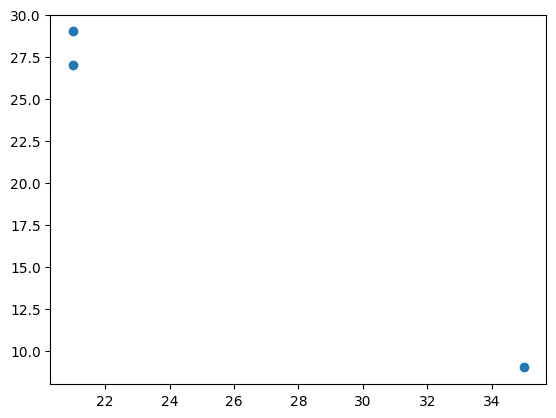

In [8]:
from matplotlib import pyplot
pyplot.scatter(df["Motivacija"], df["Anksioznost"])
pyplot.show()

In [11]:
from numpy import cov
covariance = cov(df["Motivacija"], df["Anksioznost"])
print(covariance)

[[ 65.33333333 -88.66666667]
 [-88.66666667 121.33333333]]


In [5]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(42)

In [6]:
corr, _ = pearsonr(df["Motivacija"], df["Anksioznost"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.996


In [9]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df["Motivacija"], df["Anksioznost"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.866


Test linearnosti

In [17]:
import statsmodels.formula.api as smf

fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     120.3
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0579
Time:                        12:36:36   Log-Likelihood:                -2.7201
No. Observations:                   3   AIC:                             9.440
Df Residuals:                       1   BIC:                             7.637
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.5000      1.563     26.555      

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [21]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 2.78233636910114),
 ('p-value', 0.09530904038713194),
 ('f-value', 12.782734339270398),
 ('f p-value', 0.17362397009521657)]